In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import tensorflow as tf

In [185]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv")
holidays_events = pd.read_csv("holidays_events.csv")
transactions = pd.read_csv("transactions.csv")
# train["date"] = pd.to_datetime(train["date"], infer_datetime_format=True)

### Oil

In [65]:
oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [186]:
oil["dcoilwtico"] = oil["dcoilwtico"].fillna(method="ffill")
oil["dcoilwtico"] = oil["dcoilwtico"].fillna(93.14)
oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [187]:
train = train.merge(oil, on="date", how="left")
test = test.merge(oil, on="date", how="left")

In [188]:
test["dcoilwtico"] = test["dcoilwtico"].fillna(method="ffill")
train["dcoilwtico"] = train["dcoilwtico"].fillna(method="ffill")

test["dcoilwtico"] = test["dcoilwtico"].fillna(method="backfill")
train["dcoilwtico"] = train["dcoilwtico"].fillna(method="backfill")

### Stores

In [75]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,93.14
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [76]:
test

,id,date,store_nbr,family,onpromotion,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.80
1,3000889,2017-08-16,1,BABY CARE,0,46.80
2,3000890,2017-08-16,1,BEAUTY,2,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,46.80
4,3000892,2017-08-16,1,BOOKS,0,46.80
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,0,47.26
28509,3029397,2017-08-31,9,PRODUCE,1,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26


In [189]:
all_data = pd.concat([train, test])
all_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,93.14
...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,NaN,1,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26
28509,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26


In [116]:
stores["cluster"].unique().shape

(17,)

In [74]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [190]:
all_data = all_data.merge(stores, on="store_nbr", how="left")
all_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6


### Transactions

In [101]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


<Axes: xlabel='store_nbr', ylabel='transactions'>

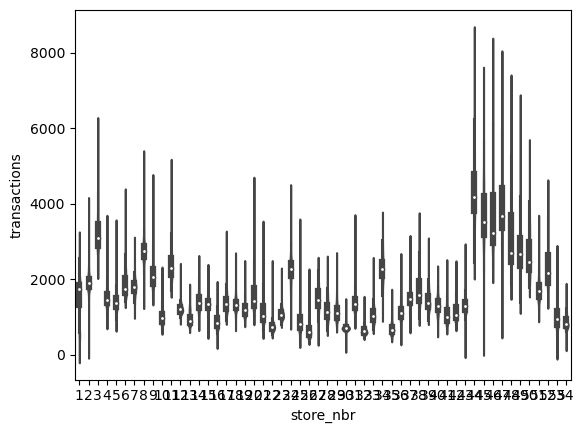

In [104]:
sns.violinplot(y=transactions["transactions"], x=transactions["store_nbr"])


### Holidays events

In [191]:
holidays_events["type_x"] = holidays_events["type"] 
holidays_events = holidays_events.drop(["locale_name", "description", "type"], axis=1)
holidays_events.transferred = holidays_events.transferred.astype("int")
holidays_events


,date,locale,transferred,type_x
0,2012-03-02,Local,0,Holiday
1,2012-04-01,Regional,0,Holiday
2,2012-04-12,Local,0,Holiday
3,2012-04-14,Local,0,Holiday
4,2012-04-21,Local,0,Holiday
...,...,...,...,...
345,2017-12-22,National,0,Additional
346,2017-12-23,National,0,Additional
347,2017-12-24,National,0,Additional
348,2017-12-25,National,0,Holiday


In [169]:
holidays_events.transferred.dtype

dtype('int32')

In [171]:
holidays_events["transferred"].value_counts()

0    338
1     12
Name: transferred, dtype: int64

In [192]:
all_data = all_data.merge(holidays_events, on="date", how="left")
all_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,locale,transferred,type_x
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,National,0.0,Holiday
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,National,0.0,Holiday
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,National,0.0,Holiday
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,National,0.0,Holiday
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,National,0.0,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,NaN,NaN,NaN
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,NaN,NaN,NaN
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,NaN,NaN,NaN
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,NaN,NaN,NaN


In [193]:
all_data.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales            28512
onpromotion          0
dcoilwtico           0
city                 0
state                0
type                 0
cluster              0
locale         2578554
transferred    2578554
type_x         2578554
dtype: int64

In [132]:
all_data["type_y"] = all_data["type_y"].fillna("work_day")
all_data["locale"] = all_data["locale"].fillna("National")
all_data["transferred"] = all_data["transferred"].fillna('True')
all_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,work_day,National,True
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,work_day,National,True
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,work_day,National,True
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,work_day,National,True


In [136]:
all_data.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dcoilwtico     float64
city            object
state           object
type_x          object
cluster          int64
type_y          object
locale          object
transferred     object
dtype: object

In [144]:
train = pd.read_csv("train.csv")
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [146]:
test = pd.read_csv("test.csv")
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [138]:
all_data = all_data.drop(["id", "date"], axis=1)
all_data

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,transferred
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,work_day,National,True
3082856,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,work_day,National,True
3082857,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,work_day,National,True
3082858,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,work_day,National,True


In [145]:
train_data = all_data.iloc[:3000888]
train_data

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,transferred
0,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
1,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
2,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
3,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
4,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,Holiday,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,POULTRY,571.333,0,46.53,Quito,Pichincha,B,6,work_day,National,True
3000884,9,PREPARED FOODS,125.960,0,46.53,Quito,Pichincha,B,6,work_day,National,True
3000885,9,PRODUCE,2041.967,13,46.53,Quito,Pichincha,B,6,work_day,National,True
3000886,9,SCHOOL AND OFFICE SUPPLIES,0.000,0,46.53,Quito,Pichincha,B,6,work_day,National,True


In [143]:
test_data = all_data.iloc[3000888::]
test_data

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,transferred
3000888,1,AUTOMOTIVE,2.0,0,46.02,Quito,Pichincha,D,13,work_day,National,True
3000889,1,BABY CARE,0.0,0,46.02,Quito,Pichincha,D,13,work_day,National,True
3000890,1,BEAUTY,5.0,0,46.02,Quito,Pichincha,D,13,work_day,National,True
3000891,1,BEVERAGES,2381.0,39,46.02,Quito,Pichincha,D,13,work_day,National,True
3000892,1,BOOKS,1.0,0,46.02,Quito,Pichincha,D,13,work_day,National,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,work_day,National,True
3082856,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,work_day,National,True
3082857,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,work_day,National,True
3082858,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,work_day,National,True


In [142]:
test

,id,date,store_nbr,family,onpromotion,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.80
1,3000889,2017-08-16,1,BABY CARE,0,46.80
2,3000890,2017-08-16,1,BEAUTY,2,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,46.80
4,3000892,2017-08-16,1,BOOKS,0,46.80
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,0,47.26
28509,3029397,2017-08-31,9,PRODUCE,1,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26
